In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("whitegrid")

In [2]:
imdb_data = pd.read_pickle('Data/df_of_imdb_data.pkl')
prev_nom_data = pd.read_pickle('Data/df_previous_nom.pkl')

In [3]:
imdb_data.head()

,imdb_id,titles,year,original_air_date,countries,language,genres,certificates,rating,votes,color_info,runtimes,box_office,producers,directors,production_company,distributors,metascore,is_nominee
0,0388130,Initial D: Third Stage,2001,13 Jan 2001 (Japan),[Japan],"[en, ja, cmn]","[Animation, Action, Romance, Sport]","[Australia:PG, Japan:G, United States:TV-PG]",7.6,1390,[Color],[100],[],[2246748],"[1245306, 1564830]","[0179653, 0021660, 0099762, 0113955, 0036168]","[0179653, 0053157, 0039940, 0921883]","{'data': {}, 'titlesRefs': {}, 'namesRefs': {}}",0
1,0273772,Don't Make Trouble!,2001,17 Jan 2001 (France),[France],"[fr, ar]","[Animation, Drama, Comedy]",[France:Tous publics],6.6,49,[Color],[70],[],"[1007620, 0099748, 0501590, 0851724]","[0002174, 0071117, 0099379, 0181117, 0216816, ...","[0072738, 0069857]",[0038517],"{'data': {}, 'titlesRefs': {}, 'namesRefs': {}}",0
2,0243017,Waking Life,2001,07 Mar 2002 (Australia),[United States],[en],"[Animation, Drama, Fantasy]","[Argentina:13, Australia:M, Brazil:Livre, Cana...",7.7,63692,[Color],[99],"{'Opening Weekend United States': '$88,977, 21...","[0438210, 0657921, 0782270, 0806189, 0808819, ...",[0000500],"[0028932, 0046530, 0042682, 0054189, 0123642, ...","[0000756, 0028932, 0007180, 0125154, 0067533, ...","{'data': {'metascore': '83', 'metacritic url':...",0
3,0291559,Wave Twisters,2001,[],[United States],[en],"[Animation, Adventure, Musical, Sci-Fi]",[United States:Unrated],7.4,551,[Color],[46],[],[1029039],"[1000898, 1037263]",[0060259],[],"{'data': {}, 'titlesRefs': {}, 'namesRefs': {}}",0
4,0277909,Mutant Aliens,2001,09 Jan 2002 (France),[United States],[en],"[Animation, Comedy, Sci-Fi]","[France:Tous publics, Germany:16, South Korea:...",6.6,1204,[Color],[81],"{'Budget': '$200,000 (estimated)'}","[0390350, 0687739]",[0687739],[0077590],"[0068070, 0112126, 0084806]","{'data': {'metascore': '39', 'metacritic url':...",0


In [4]:
imdb_data.at[3107,'year']=2019

In [5]:
imdb_data['rating'] = imdb_data['rating'].apply(lambda x: x if type(x) == float else np.nan)
imdb_data['runtimes'] = imdb_data['runtimes'].apply(lambda x: int(x[0]) if type(x[0]) == str else np.nan)
imdb_data['metascore'] = imdb_data['metascore'].apply(lambda x: int(x['data']['metascore']) if 'metascore' in x['data'].keys() else np.nan)

In [6]:
prev_nom_data.head()

,imdb_id,prev nom dir,prev nom dir encoded,prev nom prod,prev nom prod encoded
0,0388130,Not Previously Nominated,0,Not Previously Nominated,0
1,0273772,Not Previously Nominated,0,Not Previously Nominated,0
2,0243017,Not Previously Nominated,0,Not Previously Nominated,0
3,0291559,Not Previously Nominated,0,Not Previously Nominated,0
4,0277909,Not Previously Nominated,0,Not Previously Nominated,0


In [7]:
def make_df_countries(df):
    us = [1 if 'United States' in x else 0 for x in df['countries']]
    japan = [1 if 'Japan' in x else 0 for x in df['countries']]
    france = [1 if 'France' in x else 0 for x in df['countries']]
    china = [1 if 'China' in x else 0 for x in df['countries']]
    uk = [1 if 'United Kingdom' in x else 0 for x in df['countries']]
    dict = {'imdb_id':df['imdb_id'], 'us':us, 'japan':japan, 'france':france, 'china':china, 'uk':uk}
    countries = pd.DataFrame(dict)
    return countries

In [13]:
#takes training dataframe and gives a single country name from the list of countries 
def single_country_name(df):
    country_name = []
    for country in df.countries:
        if 'United States' in country:
            country_name.append('United States')
        elif 'Japan' in country:
            country_name.append('Japan')
        elif 'France' in country:
            country_name.append('France')
        elif 'China' in country:
            country_name.append('China')
        elif 'United Kingdom' in country:
            country_name.append('United Kingdom')
        else:
            country_name.append('Other')
    dict = {'imdb_id':df['imdb_id'], 'country_name':country_name}
    return pd.DataFrame(dict)

In [8]:
imdb_data = imdb_data.join(prev_nom_data.set_index('imdb_id'), on='imdb_id')

In [9]:
imdb_train = imdb_data.loc[imdb_data['year'] < 2018].copy()
imdb_test = imdb_data.loc[imdb_data['year'] >= 2018].copy()

In [10]:
countries = make_df_countries(imdb_train)
countries

,imdb_id,us,japan,france,china,uk
0,0388130,0,1,0,0,0
1,0273772,0,0,1,0,0
2,0243017,1,0,0,0,0
3,0291559,1,0,0,0,0
4,0277909,1,0,0,0,0
...,...,...,...,...,...,...
2650,8772214,0,0,0,0,0
2651,8873806,1,0,0,0,0
2652,8873842,1,0,0,0,0
2653,8885304,1,0,0,0,0


In [11]:
imdb_train = imdb_train.join(countries.set_index('imdb_id'), on='imdb_id')

In [14]:
country_name = single_country_name(imdb_train)

In [15]:
imdb_train = imdb_train.join(country_name.set_index('imdb_id'), on='imdb_id')

In [16]:
imdb_train.head()

,imdb_id,titles,year,original_air_date,countries,language,genres,certificates,rating,votes,...,prev nom dir,prev nom dir encoded,prev nom prod,prev nom prod encoded,us,japan,france,china,uk,country_name
0,0388130,Initial D: Third Stage,2001,13 Jan 2001 (Japan),[Japan],"[en, ja, cmn]","[Animation, Action, Romance, Sport]","[Australia:PG, Japan:G, United States:TV-PG]",7.6,1390,...,Not Previously Nominated,0,Not Previously Nominated,0,0,1,0,0,0,Japan
1,0273772,Don't Make Trouble!,2001,17 Jan 2001 (France),[France],"[fr, ar]","[Animation, Drama, Comedy]",[France:Tous publics],6.6,49,...,Not Previously Nominated,0,Not Previously Nominated,0,0,0,1,0,0,France
2,0243017,Waking Life,2001,07 Mar 2002 (Australia),[United States],[en],"[Animation, Drama, Fantasy]","[Argentina:13, Australia:M, Brazil:Livre, Cana...",7.7,63692,...,Not Previously Nominated,0,Not Previously Nominated,0,1,0,0,0,0,United States
3,0291559,Wave Twisters,2001,[],[United States],[en],"[Animation, Adventure, Musical, Sci-Fi]",[United States:Unrated],7.4,551,...,Not Previously Nominated,0,Not Previously Nominated,0,1,0,0,0,0,United States
4,0277909,Mutant Aliens,2001,09 Jan 2002 (France),[United States],[en],"[Animation, Comedy, Sci-Fi]","[France:Tous publics, Germany:16, South Korea:...",6.6,1204,...,Not Previously Nominated,0,Not Previously Nominated,0,1,0,0,0,0,United States


In [17]:
## Import packages
## tree will be used to plot the decisiton tree
from sklearn import tree

## This is the actual out of the box algorithm
from sklearn.tree import DecisionTreeClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [21]:
imdb_train.columns

Index(['imdb_id', 'titles', 'year', 'original_air_date', 'countries',
       'language', 'genres', 'certificates', 'rating', 'votes', 'color_info',
       'runtimes', 'box_office', 'producers', 'directors',
       'production_company', 'distributors', 'metascore', 'is_nominee',
       'prev nom dir', 'prev nom dir encoded', 'prev nom prod',
       'prev nom prod encoded', 'us', 'japan', 'france', 'china', 'uk',
       'country_name'],
      dtype='object')

In [26]:
imdb_train['metascore'] = imp_mean.fit_transform(imdb_train['metascore'].values.reshape(-1,1)).copy()

In [29]:
def genres_onehot(df):
    '''input the dataframe of movie info (df)
    outputs dataframe:
    a dataframe with imdb_id,  one-hot encoding for genres EXCEPT animation and 'Other' category for smaller genres'''
    genres_df= pd.DataFrame({
                        'Family':[],
                        'Adventure':[] ,
                        'Comedy':[],
                        'Fantasy':[],
#                        'Action':[],
#                        'Drama':[],
#                        'Sci-Fi':[],
                        'Other':[]
                            })
    for i in range(0, len(df)):
        row=df.iloc[i]
        newrow=pd.DataFrame({
                        'Family':[0],
                        'Adventure':[0] ,
                        'Comedy':[0],
                        'Fantasy':[0],
#                        'Action':[0],
#                        'Drama':[0],
#                        'Sci-Fi':[0],
                        'Other':[0]
                            })
        
        for genre in row['genres']:
            if genre == 'Animation':
                pass
            elif genre not in ['Family',
                               'Adventure',
                               'Comedy',
                               'Fantasy',
#                               'Action', 
#                               'Drama',
#                               'Sci-Fi'
                              ]:
                newrow.iloc[0, newrow.columns.get_loc('Other')] = int(1)
            else:
                newrow.iloc[0, newrow.columns.get_loc(genre)] = int(1)
        genres_df=pd.concat([genres_df, newrow],ignore_index=True )
    return(pd.concat([df,genres_df],axis=1))

In [35]:
imdb_train = genres_onehot(imdb_train).copy()

In [36]:
imdb_train.columns

Index(['imdb_id', 'titles', 'year', 'original_air_date', 'countries',
       'language', 'genres', 'certificates', 'rating', 'votes', 'color_info',
       'runtimes', 'box_office', 'producers', 'directors',
       'production_company', 'distributors', 'metascore', 'is_nominee',
       'prev nom dir', 'prev nom dir encoded', 'prev nom prod',
       'prev nom prod encoded', 'us', 'japan', 'france', 'china', 'uk',
       'country_name', 'Family', 'Adventure', 'Comedy', 'Fantasy', 'Other'],
      dtype='object')

In [79]:
from sklearn.metrics import confusion_matrix

In [40]:
def timeseries_split(df, k):
    '''takes in a movie dataframe (df),  k (int)
    and outputs a tuple that behaves like kfold.split when kfold =kfold = TimeSeriesSplit(n_splits = k,
                           test_size = 1)
    that is, the output is a tuple of 2-tuples, where
    the first element of each tuple is the indices of the train set and
    the second element is the indices of the test set
    unlike TimeSeriesSplit it can only handle one dataframe at a time'''
    if len(df['year'].value_counts()) <k:
        #print('Error: dataframe too small for k and test size')
        raise ValueError("Not enough data for given k")
        
    df=df.copy()
    
    answer=[]
    i=0
    while i <k:
        last_year=df['year'].max()
        
        #get array of indices of last year in list
        index_set=np.array(df[df['year']==last_year].index)
        
        #add these to test_sets
        #test_sets=[index_set] + test_sets
        
        #delete rows from dataframe
        df=drop_test(df,[last_year])
        #print(len(df))
        
        #add to train_sets
        index_set2=np.array(df.index)
        #print((index_set2))
        #train_sets=[index_set2]+train_sets
        
        new_set=(index_set2, index_set)
        answer=[new_set] + answer
        
        i=i+1
    
    return tuple(answer)

#Output 2 lists
#first list is a list of arrays of training indices
#second list is a list of arrays of testing indices

In [41]:
from sklearn.metrics import precision_score, recall_score

In [42]:
imdb_train.columns

Index(['imdb_id', 'titles', 'year', 'original_air_date', 'countries',
       'language', 'genres', 'certificates', 'rating', 'votes', 'color_info',
       'runtimes', 'box_office', 'producers', 'directors',
       'production_company', 'distributors', 'metascore', 'is_nominee',
       'prev nom dir', 'prev nom dir encoded', 'prev nom prod',
       'prev nom prod encoded', 'us', 'japan', 'france', 'china', 'uk',
       'country_name', 'Family', 'Adventure', 'Comedy', 'Fantasy', 'Other'],
      dtype='object')

In [68]:
def run_dec_tree(depth):
    k=0
    metrics = np.zeros((5,2))
    #forest = RandomForestClassifier(n_estimators=500, max_depth=8, random_state=614)
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    for train_index, test_index in timeseries_split(imdb_train, 5):
        
        ## get the train data
        X_tt = imdb_train.iloc[train_index][['year', 'us', 'Family', 'Adventure', 'Comedy', 'Fantasy', 'Other', 
                                             'runtimes', 'metascore',
                                             'prev nom prod encoded', 'prev nom dir encoded']]
        y_tt = imdb_train.iloc[train_index]['is_nominee']
    
    ## get the holdout data
        X_hold = imdb_train.iloc[test_index][['year', 'us', 'Family', 'Adventure', 'Comedy', 'Fantasy', 'Other', 
                                              'runtimes', 'metascore',
                                              'prev nom prod encoded', 'prev nom dir encoded']]
        y_hold = imdb_train.iloc[test_index]['is_nominee']
    
#    forest.fit(X_tt, y_tt)
        tree_clf.fit(X_tt, y_tt)
        y_pred_tree = tree_clf.predict(X_hold)
        #y_pred_forest = forest.predict(X_hold)
    
    
        metrics[k,0] = precision_score(y_hold, y_pred_tree, zero_division=0)
        metrics[k,1] = recall_score(y_hold, y_pred_tree)
        
        k+=1
    return metrics

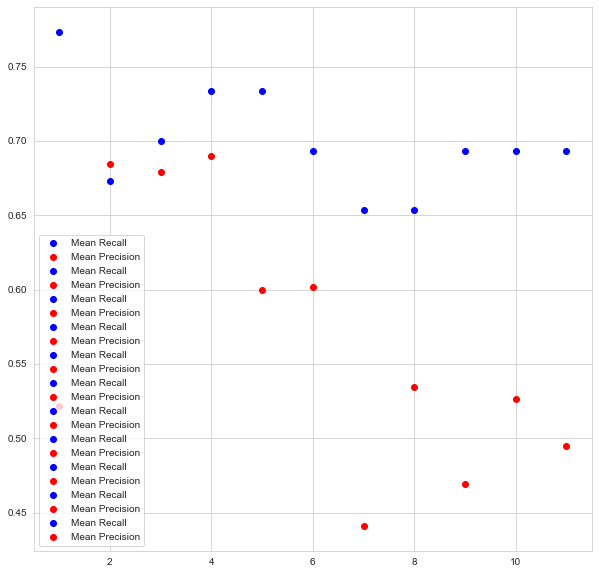

In [80]:
plt.figure(figsize=(10,10))
for i in range(1, 12, 1):
    run_dec_tree(i)
    plt.scatter(i, run_dec_tree(i).mean(axis=0)[1], c='b', label='Mean Recall')
    plt.scatter(i, run_dec_tree(i).mean(axis=0)[0], c='r', label='Mean Precision')
    plt.legend()
plt.show()
    

In [72]:
run_dec_tree(5).mean(axis=0)

array([0.57333333, 0.73333333])

In [81]:
y_pred_tree_list = tree_clf.predict(X_hold)

In [85]:
X_hold.loc[y_pred_tree_list == 1]

,year,us,Family,Adventure,Comedy,Fantasy,Other,runtimes,metascore,prev nom prod encoded,prev nom dir encoded
2412,2017,1,1.0,1.0,1.0,1.0,1.0,104,75.0,1,0
2508,2017,0,1.0,1.0,1.0,1.0,0.0,83,73.0,1,1
2518,2017,0,1.0,1.0,0.0,1.0,0.0,103,75.0,1,1
2586,2017,1,1.0,1.0,1.0,1.0,1.0,105,81.0,1,1


In [91]:
imdb_train.iloc[2518]

imdb_id                                                            6336356
titles                                         Mary and the Witch's Flower
year                                                                  2017
original_air_date                                      08 Jul 2017 (Japan)
countries                                                          [Japan]
language                                                              [ja]
genres                             [Animation, Adventure, Family, Fantasy]
certificates             [Argentina:Atp::(with warning), Australia:PG, ...
rating                                                                 6.8
votes                                                                14131
color_info                                                         [Color]
runtimes                                                               103
box_office                                                              []
producers                

In [188]:
def run_forest(estimators, depth):
    k=0
    metrics = np.zeros((5,2))
    forest = RandomForestClassifier(n_estimators=estimators, max_depth=depth, random_state=614)
    
    for train_index, test_index in timeseries_split(imdb_train, 5):
        
        ## get the train data
        X_tt = imdb_train.iloc[train_index][['year', 'us', 'Family', 'Adventure', 'Comedy', 'Fantasy', 'Other', 
                                             'runtimes', 'metascore',
                                             'prev nom prod encoded', 'prev nom dir encoded']]
        y_tt = imdb_train.iloc[train_index]['is_nominee']
    
    ## get the holdout data
        X_hold = imdb_train.iloc[test_index][['year', 'us', 'Family', 'Adventure', 'Comedy', 'Fantasy', 'Other', 
                                              'runtimes', 'metascore',
                                              'prev nom prod encoded', 'prev nom dir encoded']]
        y_hold = imdb_train.iloc[test_index]['is_nominee']
    
        forest.fit(X_tt, y_tt)
        
        
        y_pred_forest = 1*forest.predict_proba(X_hold)[:,1]>0.2
    
    
        metrics[k,0] = precision_score(y_hold, y_pred_forest, zero_division=0)
        metrics[k,1] = recall_score(y_hold, y_pred_forest)
        
        k+=1
    return metrics

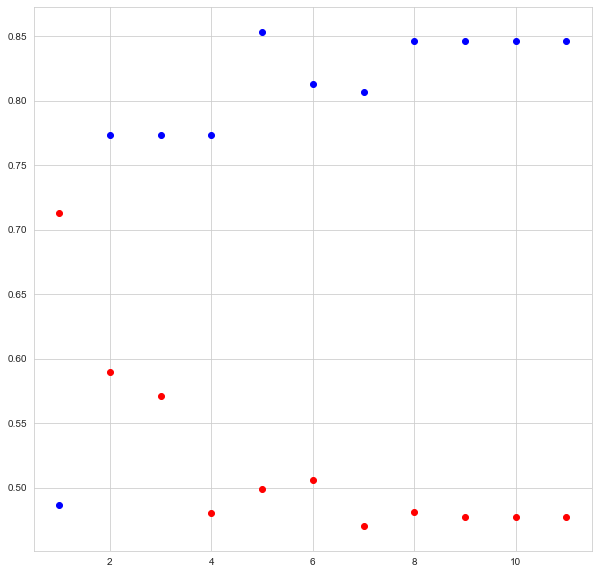

In [189]:
plt.figure(figsize=(10,10))
for i in range(1, 12, 1):
    
    plt.scatter(i, run_forest(500, i).mean(axis=0)[1], c='b')
    plt.scatter(i, run_forest(500, i).mean(axis=0)[0], c='r')
plt.show()

In [161]:
forest = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=614)
for train_index, test_index in timeseries_split(imdb_train, 5):
        
    X_tt = imdb_train.iloc[train_index][['year', 'us', 'Family', 'Adventure', 'Comedy', 'Fantasy', 'Other', 
                                             'runtimes', 'metascore',
                                             'prev nom prod encoded', 'prev nom dir encoded']]
    y_tt = imdb_train.iloc[train_index]['is_nominee']
    
    
    X_hold = imdb_train.iloc[test_index][['year', 'us', 'Family', 'Adventure', 'Comedy', 'Fantasy', 'Other', 
                                              'runtimes', 'metascore',
                                              'prev nom prod encoded', 'prev nom dir encoded']]
    y_hold = imdb_train.iloc[test_index]['is_nominee']
    
    forest.fit(X_tt, y_tt)
        
        
    y_pred_forest = forest.predict(X_hold)

In [162]:
X_hold.loc[y_pred_forest==1]

,year,us,Family,Adventure,Comedy,Fantasy,Other,runtimes,metascore,prev nom prod encoded,prev nom dir encoded
2412,2017,1,1.0,1.0,1.0,1.0,1.0,104,75.0,1,0
2518,2017,0,1.0,1.0,0.0,1.0,0.0,103,75.0,1,1
2554,2017,1,1.0,0.0,0.0,0.0,1.0,94,78.0,1,1
2586,2017,1,1.0,1.0,1.0,1.0,1.0,105,81.0,1,1


In [153]:
imdb_train.iloc[2586]

imdb_id                                                            2380307
titles                                                                Coco
year                                                                  2017
original_air_date                                        22 Nov 2017 (USA)
countries                                                  [United States]
language                                                          [en, es]
genres                   [Animation, Adventure, Comedy, Family, Fantasy...
certificates             [Argentina:Atp, Australia:PG, Austria:6, Brazi...
rating                                                                 8.4
votes                                                               478317
color_info                                                         [Color]
runtimes                                                               105
box_office               {'Budget': '$175,000,000 (estimated)', 'Openin...
producers                

In [158]:
forest.feature_importances_

array([0.05884381, 0.04356226, 0.06407805, 0.01643215, 0.01649093,
       0.01338142, 0.01137604, 0.08466778, 0.61574663, 0.02652085,
       0.04890007])

In [135]:
X_hold.columns

Index(['year', 'us', 'Family', 'Adventure', 'Comedy', 'Fantasy', 'Other',
       'runtimes', 'metascore', 'prev nom prod encoded',
       'prev nom dir encoded'],
      dtype='object')

In [136]:
recall_score(y_hold, forest.predict(X_hold))

0.4

In [137]:
X_hold.loc[forest.predict_proba(X_hold)[:,1] > 0.2]

,year,us,Family,Adventure,Comedy,Fantasy,Other,runtimes,metascore,prev nom prod encoded,prev nom dir encoded
2412,2017,1,1.0,1.0,1.0,1.0,1.0,104,75.0,1,0
2508,2017,0,1.0,1.0,1.0,1.0,0.0,83,73.0,1,1
2518,2017,0,1.0,1.0,0.0,1.0,0.0,103,75.0,1,1
2554,2017,1,1.0,0.0,0.0,0.0,1.0,94,78.0,1,1
2586,2017,1,1.0,1.0,1.0,1.0,1.0,105,81.0,1,1
2621,2017,1,1.0,1.0,1.0,0.0,1.0,108,58.0,1,1


In [175]:
y_hold.loc[forest.predict_proba(X_hold)[:,1] > 0.2]

2412    0
2508    0
2518    0
2554    1
2586    1
2621    1
Name: is_nominee, dtype: int64

In [185]:
forest.predict_proba(X_hold)[:,1][forest.predict_proba(X_hold)[:,1]>0.2]

array([0.59660959, 0.3794705 , 0.54012047, 0.57994553, 0.80699502,
       0.20857916])

In [176]:
pred = 1*forest.predict_proba(X_hold)[:,1] > 0.2

In [177]:
recall_score(y_hold, pred)

0.6

In [180]:
precision_score(y_hold, pred)

0.5

In [187]:
imdb_train.iloc[2412]

imdb_id                                                            4116284
titles                                               The Lego Batman Movie
year                                                                  2017
original_air_date                                        10 Feb 2017 (USA)
countries                              [United States, Denmark, Australia]
language                                                              [en]
genres                   [Animation, Action, Adventure, Comedy, Family,...
certificates             [Argentina:Atp, Australia:PG, Austria:6, Brazi...
rating                                                                 7.3
votes                                                               146819
color_info                                                 [Color::(ACES)]
runtimes                                                               104
box_office               {'Budget': '$80,000,000 (estimated)', 'Opening...
producers                

In [170]:
cutoffs = np.arange(0.001,.975,.001)

prec_scores = []
rec_scores = []

for cutoff in cutoffs:
    pred = 1*(forest.predict_proba(X_hold)[:,1] >= cutoff)
    
    prec_scores.append(precision_score(y_hold, pred, zero_division=0))
    rec_scores.append(recall_score(y_hold, pred, zero_division=0))

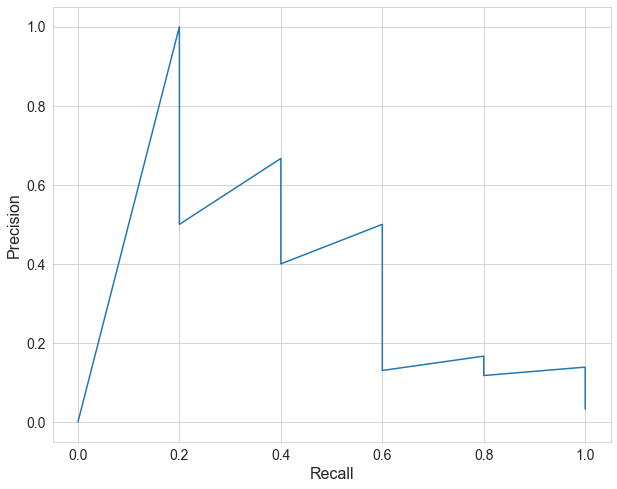

In [171]:
plt.figure(figsize=(10,8))

plt.plot(rec_scores, prec_scores)

plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [140]:
from sklearn.linear_model import LogisticRegression

In [143]:
k=0
metrics = np.zeros((5,2))
clf = LogisticRegression(max_iter=10000)
for train_index, test_index in timeseries_split(imdb_train, 5):
        
    X_tt = imdb_train.iloc[train_index][['year', 'us', 'Family', 'Adventure', 'Comedy', 'Fantasy', 'Other', 
                                             'runtimes', 'metascore',
                                             'prev nom prod encoded', 'prev nom dir encoded']]
    y_tt = imdb_train.iloc[train_index]['is_nominee']
    
    
    X_hold = imdb_train.iloc[test_index][['year', 'us', 'Family', 'Adventure', 'Comedy', 'Fantasy', 'Other', 
                                              'runtimes', 'metascore',
                                              'prev nom prod encoded', 'prev nom dir encoded']]
    y_hold = imdb_train.iloc[test_index]['is_nominee']
    
    clf.fit(X_tt, y_tt)
        
        
    y_pred = clf.predict(X_hold)
    
    metrics[k,0] = precision_score(y_hold, y_pred, zero_division=0)
    metrics[k,1] = recall_score(y_hold, y_pred)
        
    k+=1

In [145]:
metrics.mean(axis=0)

array([0.67833333, 0.7       ])

In [146]:
X_hold.loc[y_pred==1]

,year,us,Family,Adventure,Comedy,Fantasy,Other,runtimes,metascore,prev nom prod encoded,prev nom dir encoded
2412,2017,1,1.0,1.0,1.0,1.0,1.0,104,75.0,1,0
2554,2017,1,1.0,0.0,0.0,0.0,1.0,94,78.0,1,1
2586,2017,1,1.0,1.0,1.0,1.0,1.0,105,81.0,1,1


In [149]:
imdb_train.iloc[2586]

imdb_id                                                            2380307
titles                                                                Coco
year                                                                  2017
original_air_date                                        22 Nov 2017 (USA)
countries                                                  [United States]
language                                                          [en, es]
genres                   [Animation, Adventure, Comedy, Family, Fantasy...
certificates             [Argentina:Atp, Australia:PG, Austria:6, Brazi...
rating                                                                 8.4
votes                                                               478317
color_info                                                         [Color]
runtimes                                                               105
box_office               {'Budget': '$175,000,000 (estimated)', 'Openin...
producers                

In [ ]:
clf.predict()